<a href="https://colab.research.google.com/github/SovetovAleksey/Data_analysis_algorithms/blob/2_quest/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [2]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features=2, n_targets=1, n_informative=2, 
                                                      noise=5, random_state=1, coef=True)

data.mean(axis=0), data.std(axis=0)

(array([0.02663608, 0.03950183]), array([1.00326526, 1.00835918]))

In [3]:
def data_standartisation(X):
    X = ((X - X.mean(axis=0)) / X.std(axis=0))
    return X

data = data_standartisation(data)

data.mean(axis=0), data.std(axis=0)

(array([7.93809463e-17, 4.41868764e-17]), array([1., 1.]))

In [4]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [5]:
%%time

#GD

w = np.zeros(2)
errors_gd = []
eta = 0.1
max_iter = 1e5
min_weight_dist = 1e-7
weight_dist = np.inf
iter_num_gd = 0

while weight_dist > min_weight_dist and iter_num_gd < max_iter:
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    errors_gd.append(mserror(data, new_w, target))
    
    iter_num_gd += 1
    w = new_w

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_gd[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 38.1128
CPU times: user 19.1 ms, sys: 3.18 ms, total: 22.3 ms
Wall time: 25.3 ms


In [6]:
%%time

#SGD

w = np.zeros(2)
errors_sgd = []
eta = 0.1
max_iter = 1e5
min_weight_dist = 1e-7
weight_dist = np.inf
iter_num_sgd = 0

while weight_dist > min_weight_dist and iter_num_sgd < max_iter:
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    errors_sgd.append(mserror(data, new_w, target))
    
    iter_num_sgd += 1
    w = new_w

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_sgd[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 41.4949
CPU times: user 3.54 s, sys: 17.3 ms, total: 3.56 s
Wall time: 3.62 s


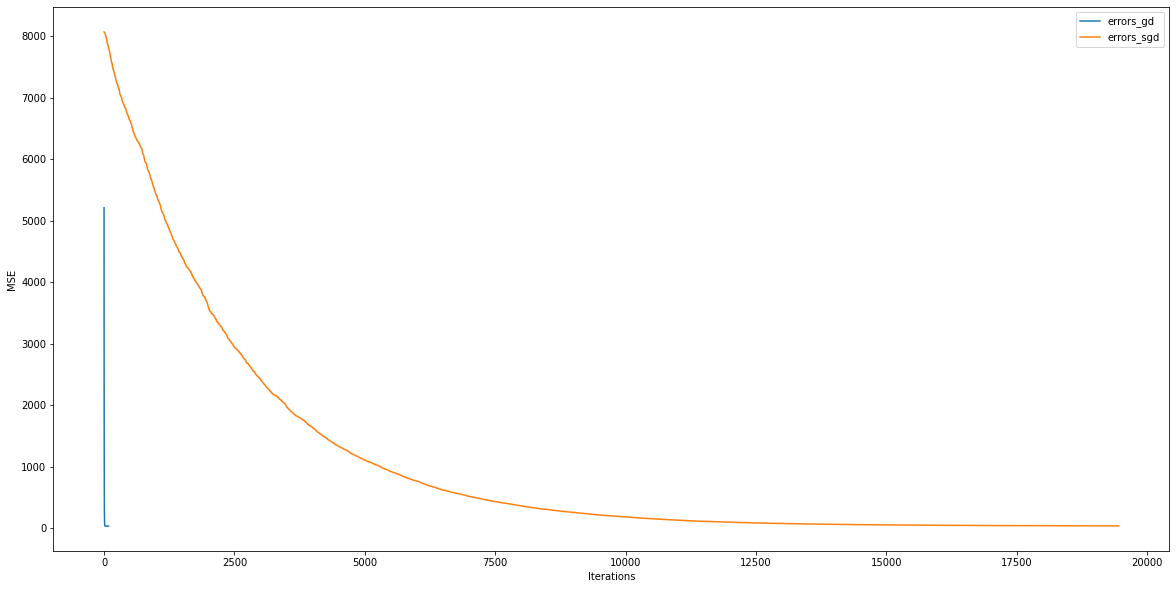

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(errors_gd)), errors_gd, label='errors_gd')
plt.plot(range(len(errors_sgd)), errors_sgd, label='errors_sgd')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

In [8]:
iter_num_gd, iter_num_sgd

(89, 19454)

Градиентный спуск приходит к минимуму ошибки почти сразу. Для стохастического потребовалось гораздо больше итераций. На использованных данных скорость выполнения алгоритмов сильно отличается, но на большем объеме данных всё будет иначе, SGD не будет выглядеть таким медленным, GD потребуется больше времени для вычислений.